In [36]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import linregress

In [37]:
file = "Resources/acs2018_5yr_B07009_86000US63040/acs2018_5yr_B07009_86000US63040/acs2018_5yr_B07009_86000US63040.csv"

In [38]:
# Read and display the CSV with Pandas
mobility_stlc_df = pd.read_csv("Resources/acs2018_5yr_B07009_86000US63040/acs2018_5yr_B07009_86000US63040/acs2018_5yr_B07009_86000US63040.csv")
mobility_stlc_df.head()

,geoid,name,B07009001,"B07009001, Error",B07009002,"B07009002, Error",B07009003,"B07009003, Error",B07009004,"B07009004, Error",...,B07009032,"B07009032, Error",B07009033,"B07009033, Error",B07009034,"B07009034, Error",B07009035,"B07009035, Error",B07009036,"B07009036, Error"
0,05000US29189,"St. Louis County, MO",689502,113,46247,1520,146184,2770,199438,3215,...,324,120,480,201,486,168,877,268,580,183
1,86000US63005,63005,11879,461,97,57,824,133,1965,246,...,0,17,12,17,12,17,7,11,42,48
2,86000US63011,63011,26481,657,1231,434,3792,484,6548,579,...,0,23,0,23,0,23,26,36,12,21
3,86000US63017,63017,30786,672,637,173,3873,391,6243,590,...,36,46,0,23,14,22,77,86,12,19
4,86000US63021,63021,39205,706,1287,300,5947,483,10013,660,...,20,33,3,19,0,26,49,80,50,82


In [39]:
red_mobility_stlc_df = mobility_stlc_df[['name','B07009001','B07009002','B07009003','B07009004','B07009005','B07009006']]
red_mob_stlc_df = red_mobility_stlc_df.rename({'B07009001': 'Total',
'B07009002': 'Less than high school graduate',
'B07009003': 'High school graduate',
'B07009004': "Some college or associate's degree",
'B07009005': "Bachelor's degree",
"B07009006": "Graduate or professional degree"},axis=1)
red_mob_stlc_df.head()

,name,Total,Less than high school graduate,High school graduate,Some college or associate's degree,Bachelor's degree,Graduate or professional degree
0,"St. Louis County, MO",689502,46247,146184,199438,171146,126487
1,63005,11879,97,824,1965,4473,4520
2,63011,26481,1231,3792,6548,8967,5943
3,63017,30786,637,3873,6243,10379,9654
4,63021,39205,1287,5947,10013,13286,8672


In [40]:
red_mob_stlc_df = red_mobility_stlc_df.rename({'B07009001': 'Total',
'B07009002': 'Less than high school graduate',
'B07009003': 'High school graduate',
'B07009004': "Some college or associate's degree",
'B07009005': "Bachelor's degree",
"B07009006": "Graduate or professional degree"},axis=1)
red_mob_stlc_df.head()

,name,Total,Less than high school graduate,High school graduate,Some college or associate's degree,Bachelor's degree,Graduate or professional degree
0,"St. Louis County, MO",689502,46247,146184,199438,171146,126487
1,63005,11879,97,824,1965,4473,4520
2,63011,26481,1231,3792,6548,8967,5943
3,63017,30786,637,3873,6243,10379,9654
4,63021,39205,1287,5947,10013,13286,8672


In [41]:
# Read and display the CSV with Pandas
house_educ_df = pd.read_csv('Resources/acs2018_5yr_B06009_86000US63040/acs2018_5yr_B06009_86000US63040/acs2018_5yr_B06009_86000US63040.csv')
house_educ_df.head()


,geoid,name,B06009001,"B06009001, Error",B06009002,"B06009002, Error",B06009003,"B06009003, Error",B06009004,"B06009004, Error",...,B06009026,"B06009026, Error",B06009027,"B06009027, Error",B06009028,"B06009028, Error",B06009029,"B06009029, Error",B06009030,"B06009030, Error"
0,05000US29189,"St. Louis County, MO",689502,113,46247,1520,146184,2770,199438,3215,...,7845,901,10259,880,10297,829,13579,775,18173,828
1,86000US63005,63005,11879,461,97,57,824,133,1965,246,...,35,48,114,52,181,74,337,114,1144,211
2,86000US63011,63011,26481,657,1231,434,3792,484,6548,579,...,525,336,388,157,586,227,630,171,747,205
3,86000US63017,63017,30786,672,637,173,3873,391,6243,590,...,136,75,386,169,512,216,1340,271,2291,262
4,86000US63021,63021,39205,706,1287,300,5947,483,10013,660,...,522,222,568,219,451,153,1224,219,1483,278


In [42]:
redu_house_educ_df = house_educ_df[['name','B06009001','B06009002','B06009003','B06009004','B06009005','B06009006']]
redu_house_educ_df.head()

,name,B06009001,B06009002,B06009003,B06009004,B06009005,B06009006
0,"St. Louis County, MO",689502,46247,146184,199438,171146,126487
1,63005,11879,97,824,1965,4473,4520
2,63011,26481,1231,3792,6548,8967,5943
3,63017,30786,637,3873,6243,10379,9654
4,63021,39205,1287,5947,10013,13286,8672


In [43]:
redu_house_educ_df = redu_house_educ_df.rename({'B06009001': 'Total',
'B06009002': 'Less than high school graduate',
'B06009003': 'High school graduate',
'B06009004': "Some college or associate's degree",
'B06009005': "Bachelor's degree",
"B06009006": "Graduate or professional degree"},axis=1)
redu_house_educ_df.head()

,name,Total,Less than high school graduate,High school graduate,Some college or associate's degree,Bachelor's degree,Graduate or professional degree
0,"St. Louis County, MO",689502,46247,146184,199438,171146,126487
1,63005,11879,97,824,1965,4473,4520
2,63011,26481,1231,3792,6548,8967,5943
3,63017,30786,637,3873,6243,10379,9654
4,63021,39205,1287,5947,10013,13286,8672


In [44]:
redu_house_educ_df = redu_house_educ_df.rename({'B06009001': 'Total',
'B06009002': 'Less than high school graduate',
'B06009003': 'High school graduate',
'B06009004': "Some college or associate's degree",
'B06009005': "Bachelor's degree",
"B06009006": "Graduate or professional degree"},axis=1)
redu_house_educ_df.head()

,name,Total,Less than high school graduate,High school graduate,Some college or associate's degree,Bachelor's degree,Graduate or professional degree
0,"St. Louis County, MO",689502,46247,146184,199438,171146,126487
1,63005,11879,97,824,1965,4473,4520
2,63011,26481,1231,3792,6548,8967,5943
3,63017,30786,637,3873,6243,10379,9654
4,63021,39205,1287,5947,10013,13286,8672


In [45]:
# Calculate the sum of each column
cols = [ 'Less than high school graduate','High school graduate',"Some college or associate's degree","Bachelor's degree",'Graduate or professional degree']
# redu_house_educ_df[cols].sum(axis=1) #axis=1 makes the summation occur across the rows, rather than down the columns.
# Divide the dataframe by the resulting series
new_df = (redu_house_educ_df[cols].div(redu_house_educ_df[cols].sum(axis=1), axis=0)*100)
new_df.head()

,Less than high school graduate,High school graduate,Some college or associate's degree,Bachelor's degree,Graduate or professional degree
0,6.707305,21.201389,28.924934,24.821683,18.344689
1,0.816567,6.936611,16.541796,37.654685,38.050341
2,4.648616,14.319701,24.727163,33.862014,22.442506
3,2.069122,12.580394,20.278698,33.713376,31.358410
4,3.282745,15.168984,25.540110,33.888535,22.119628


In [46]:
zipcode = ['STLC','63005','63011','63017','63021','63025','63026','63031','63033','63034','63038','63040','63042','63043','63044','63045','63049','63069','63074','63088','63105','63114','63117','63119','63120','63121','63122','63123','63124','63125','63126','63127','63128','63129','63130','63131','63132','63133','63134','63135','63136','63137','63138','63140','63141','63143','63144','63146','63147','63304']
new_df2 = new_df.assign(Zipcode = zipcode)
new_df2 = new_df2.dropna()
new_df2.head()

,Less than high school graduate,High school graduate,Some college or associate's degree,Bachelor's degree,Graduate or professional degree,Zipcode
0,6.707305,21.201389,28.924934,24.821683,18.344689,STLC
1,0.816567,6.936611,16.541796,37.654685,38.050341,63005
2,4.648616,14.319701,24.727163,33.862014,22.442506,63011
3,2.069122,12.580394,20.278698,33.713376,31.358410,63017
4,3.282745,15.168984,25.540110,33.888535,22.119628,63021


In [47]:
#Regroup education level
Zipcode = new_df2['Zipcode']
Less_than_Bachelor_degree = new_df2['Less than high school graduate'] + new_df2['High school graduate'] + new_df2["Some college or associate's degree"]
Bachelor_degree_to_higher = new_df2["Bachelor's degree"] + new_df2['Graduate or professional degree']
 #New dataframe
educ_zip_df = pd.DAtaFrame({'Zipcode':Zipcode,"Less than Bachelor's degree":Less_than_Bachelor_degree, 'Graduate or professional degree':Bachelor_to_higher})
educ_zip_df

AttributeError: module 'pandas' has no attribute 'DAtaFrame'

In [29]:
# setting first name as index column 
new_df3 = new_df2.reset_index()
new_df4 = new_df3.set_index(['Zipcode'])
new_df4 = new_df4.drop('index', axis=1)  
new_df4.head()
#new_df3.head()

,Less than high school graduate,High school graduate,Some college or associate's degree,Bachelor's degree,Graduate or professional degree
Zipcode,,,,,
STLC,6.707305,21.201389,28.924934,24.821683,18.344689
63005,0.816567,6.936611,16.541796,37.654685,38.050341
63011,4.648616,14.319701,24.727163,33.862014,22.442506
63017,2.069122,12.580394,20.278698,33.713376,31.358410
63021,3.282745,15.168984,25.540110,33.888535,22.119628


In [25]:
#Regroup education level
Zipcode = new_df4['Zipcode']
Less_than_Bachelor_degree = new_df4['Less than high school graduate'] + new_df4['High school graduate'] + new_df4["Some college or associate's degree"]
Bachelor_degree_to_higher = new_df4["Bachelor's degree"] + new_df4['Graduate or professional degree']
 #New dataframe
educ_zip_df = pd.DAtaFrame({'Zipcode':Zipcode,"Less than Bachelor's degree":Less_than_Bachelor_degree, 'Graduate or professional degree':Bachelor_to_higher})
educ_zip_df

KeyError: 'Zipcode'

In [31]:
cols_to_sum = new_df4.columns[ : new_df4.shape[1]-3]
new_df4["Less than Bachelor's degree"] = new_df4[cols_to_sum].sum(axis=1)
new_df4.head()

,Less than high school graduate,High school graduate,Some college or associate's degree,Bachelor's degree,Graduate or professional degree,Less than Bachelor's degree
Zipcode,,,,,,
STLC,6.707305,21.201389,28.924934,24.821683,18.344689,56.833628
63005,0.816567,6.936611,16.541796,37.654685,38.050341,24.294974
63011,4.648616,14.319701,24.727163,33.862014,22.442506,43.695480
63017,2.069122,12.580394,20.278698,33.713376,31.358410,34.928214
63021,3.282745,15.168984,25.540110,33.888535,22.119628,43.991838


In [34]:
#cols_to_sum = new_df4.columns[ : new_df4.shape[1]--1]
new_df4["Bachelor's degree and higher"] = new_df4.iloc[:,-4:-2].sum(axis=1)
new_df4.head()

,Less than high school graduate,High school graduate,Some college or associate's degree,Bachelor's degree,Graduate or professional degree,Less than Bachelor's degree,Bachelor's degree and higher
Zipcode,,,,,,,
STLC,6.707305,21.201389,28.924934,24.821683,18.344689,56.833628,43.166372
63005,0.816567,6.936611,16.541796,37.654685,38.050341,24.294974,75.705026
63011,4.648616,14.319701,24.727163,33.862014,22.442506,43.695480,56.304520
63017,2.069122,12.580394,20.278698,33.713376,31.358410,34.928214,65.071786
63021,3.282745,15.168984,25.540110,33.888535,22.119628,43.991838,56.008162


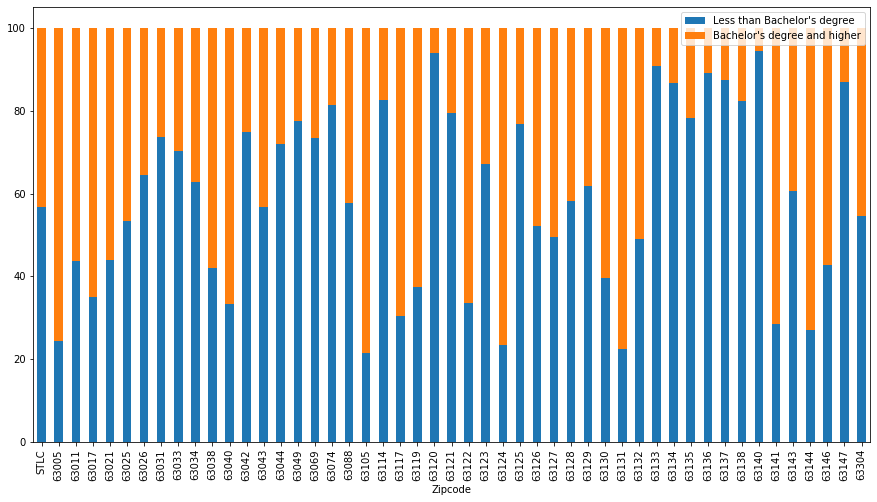

In [35]:
 df2 = new_df4[["Less than Bachelor's degree", "Bachelor's degree and higher"]]
df2.head()
fig = df2.plot(kind='bar', stacked=True,figsize=(15,8))


In [ ]:
 plt.figure();

 new_df4['Less than high school graduate'].hist()
    


In [ ]:
# # Using 'Address' as the column name and equating it to the list 
# df2 = df.assign(address = ['Delhi', 'Bangalore', 'Chennai', 'Patna'])

In [ ]:
# Calculate the sum of each column (df[cols].sum(axis=1). axis=1 makes the summation occur across the rows, rather than down the columns.
# Divide the dataframe by the resulting series (df[cols].div(df[cols].sum(axis=1), axis=0). axis=0 makes the division happen across the columns.
# To finish, multiply the results by 100 so they are percentages between 0 and 100 instead of proportions between 0 and 1 (or you can skip this step and store them as proportions).

In [ ]:
# crime_url = 'https://opendata.arcgis.com/datasets/a628ae19fb094f179cc9927a550a55d2_0.geojson'
# print(json.dumps(crime_url, indent=4, sort_keys=True)) 



In [ ]:
# Read and display the CSV with Pandas
file5_df = pd.read_csv('Resources/acs2018_5yr_B19001_86000US63040/acs2018_5yr_B19001_86000US63040/acs2018_5yr_B19001_86000US63040.csv')
file5_df.head()

In [ ]:
reduced_file5_df = file5_df[['geoid',  'name','B19001001','B19001002','B19001003','B19001004','B19001005','B19001006','B19001007','B19001008','B19001009','B19001010','B19001011','B19001012','B19001013','B19001014','B19001015','B19001016','B19001017']]
reduced_file5_df.head()

In [ ]:
reduced_file5_df = reduced_file5_df.rename({'B19001001': 'Total',
'B19001002': 'less than $10,000',
'B19001003': '$10,000 to 14,999',
'B19001004': '$15,000 to 19,999',
'B19001005': '$20,000 to 24,999',
'B19001006': '$25,000 to 29,999',
'B19001007': '$30,000 to 34,999',                                               
'B19001008': '$35,000 to 39,999',                                               
'B19001009': '$40,000 to 44,999',                                               
'B19001010': '$45,000 to 49,999',
'B19001011': '$50,000 to 59,999',
'B19001012': '$60,000 to 74,999',                                               
'B19001013': '$75,000 to 99,999',                                               
'B19001014': '$100,000 to 124,999',                                               
'B19001015': '$125,000 to 149,999',                                               
'B19001016': '$150,000 to 199,999',                                              
'B19001017': '$200,000 or more'},axis=1)
reduced_file5_df.head()

In [ ]:
# Read and display the CSV with Pandas
file6_df = pd.read_csv('Resources/acs2018_5yr_B15011_86000US63040/acs2018_5yr_B15011_86000US63040/acs2018_5yr_B15011_86000US63040.csv')
file6_df.head()


In [ ]:
# file6_df.set_index(["geoid","name"], inplace=True)
# mosaic_plot(file6_df,
#            {'01000US':"r", '04000US29':"b", '05000US29189':"y", '86000US63005':"g"}, # dict of color, mandatory
#            x_label='My Category', 
#            )

In [ ]:
reduced1_file6_df = file6_df[['name','B15011001','B15011002','B15011003','B15011004','B15011005','B15011006','B15011007','B15011008','B15011009','B15011010','B15011012','B15011013','B15011014','B15011015','B15011016','B15011019','B15011020','B15011021','B15011022','B15011023','B15011025','B15011026','B15011027','B15011028','B15011029','B15011031','B15011032','B15011033','B15011034','B15011035','B15011037','B15011038','B15011039']]
reduced1_file6_df.head()

In [ ]:
# reduced1_file6_df.set_index(["", "name"], inplace=True)
# mosaic_plot(new_df8,
#            {0:"r", 1:"b", 2:"y", 3:"g"}, # dict of color, mandatory
#            x_label='My Category', 
#            )

In [ ]:
age_gend_df = reduced1_file6_df[['name','B15011003','B15011009','B15011015','B15011021','B15011028','B15011034']]
age_gend_df
cols = ['B15011003',"B15011009","B15011015","B15011021","B15011028","B15011034"]
#redu_house_educ_df[cols].sum(axis=1) #axis=1 makes the summation occur across the rows, rather than down the columns.
# Divide the dataframe by the resulting series
age_gend_df = (age_gend_df[cols].div(age_gend_df[cols].sum(axis=1), axis=0)*100)
new_df2 = new_df2.dropna()
age_gend_df.head()

In [ ]:
 age_gend_df.head()


In [ ]:
# Adding Zipcode as a new column
zipcode = ['USA','MO','STLC','63005','63011','63017','63021','63025','63026','63031','63033','63034','63038','63040','63042','63043','63044','63045','63049','63069','63074','63088','63105','63114','63117','63119','63120','63121','63122','63123','63124','63125','63126','63127','63128','63129','63130','63131','63132','63133','63134','63135','63136','63137','63138','63140','63141','63143','63144','63146','63147','63304']
new_df7 = age_gend_df.assign(Zipcode = zipcode)
# Add Zipcode as the index
new_df7 = new_df7.set_index(['Zipcode'])
new_df7.head()


In [ ]:
new_df8 = new_df7.rename({'B15011003': '25-39 years male graduate',
'B15011009': '40-64 years male graduate',
'B15011015': '65 years and over male graduate',
'B15011021': "25-39 years female graduate",
'B15011028': "40-64 years female graduate",
"B15011034": "65 years and over male graduate"},axis=1)
new_df8.head()


In [ ]:
new_df8.reset_index()
new_df8 = new_df8.dropna()
new_df8.head()

In [ ]:
stlc_gr_df =new_df8.drop(new_df8.index[[0,1]])
stlc_gr_df.head()
#df.drop(df.index[[2,3]])

In [ ]:
stlc_gr_df1 = stlc_gr_df[['25-39 years male graduate','40-64 years male graduate','65 years and over male graduate']]
stlc_gr_df1.head()
fig = stlc_gr_df1.plot(kind='bar', stacked=True,figsize=(15,8))

In [ ]:
fig = stlc_gr_df1.plot(kind='bar', stacked=True)
#fig.set_size_inches(18.5, 10.5,forward=True)


In [ ]:
fig = new_df8.plot(kind='barh', stacked=True)
fig.set_size_inches(18.5, 10.5,forward=True)


In [ ]:
#bins =['63005','63011','63017','63021','63025','63026','63031','63033','63034','63038','63040','63042','63043','63044','63049','63069','63074','63088','63105','63114','63117','63119','63120','63121','63122','63123','63124','63125','63126','63127','63128','63129','63130','63131','63132','63133','63134','63135','63136','63137','63138','63140','63141','63143','63144','63146','63147','63304'
new_df8.hist(column=['25-39 years male graduate','25-39 years female graduate'], bins=50)
new_df8[['25-39 years male graduate','25-39 years female graduate']].plot.hist(alpha=0.4)
#df[["Test_1", "Test_2"]].plot.hist() 
#df.hist(column=["Test_1", "Test_2"])

In [ ]:
# new_df8.plot(kind='scatter',x='Zipcode',y='25-39 male graduate')
# plt.show()
# # df.plot(kind='scatter',x='num_children',y='num_pets',color='red')
# # plt.show()

In [ ]:
# new_df7 = new_df7.set_index(['Zipcode'])
# #new_df7 = new_df7.drop('index', axis=1)  
# new_df7

In [ ]:
# new_df7 = new_df7.drop(index=[0,1,2])
# new_df7.head()

In [ ]:
new_redu_file6_df = new_redu_file6_df.reset_index(inplace = True)
new_redu_file6_df

In [ ]:
#data.reset_index(inplace = True) 
# print(df.drop(index=['Bob', 'Dave', 'Frank']))

In [ ]:
reduced2_file6_df = file6_df[['name','B15011001','B15011002','B15011003','B15011004','B15011005','B15011006']]
reduced2_file6_df.head()